In [12]:
import xarray as xr
import numpy as np

# directory for netCDF files to be read and saved
dnc = "/home/rfrost/simulations/nc/full_step_9/"

def roll_factor(dnc):
    """Calculate roll factor using polar grid autocorrelation of w
    
    :param str dnc: absolute path to directory for saving output netCDF files
    :param Dataset stats: output from calc_stats_tran
    """
    # read in rotated autocorr
    Rww = xr.open_dataarray(f"{dnc}R_2d_rot.nc")
    # extract important stuff
    ntime = Rww.time.size
    nz = Rww.z.size

    # calculate roll factor
    roll = Rww[:,:,0,:].max(dim="x", skipna=True) - Rww[:,0,:,:].min(dim="y", skipna=True)
    # roll = np.nanmax(Rww[:,:,0,:], axis=1) - np.nanmin(Rww[:,0,:,:], axis=1)
    
    fsave = f"{dnc}rollfactor_rot.nc"

    # # output to netCDF
    # print(f"Saving file: {fsave}")
    # with ProgressBar():
    #     roll.to_netcdf(fsave, mode="w")
    print("Finished!")
    return roll

In [13]:
roll = roll_factor(dnc)

Finished!


In [15]:
roll.shape

(577, 160)

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

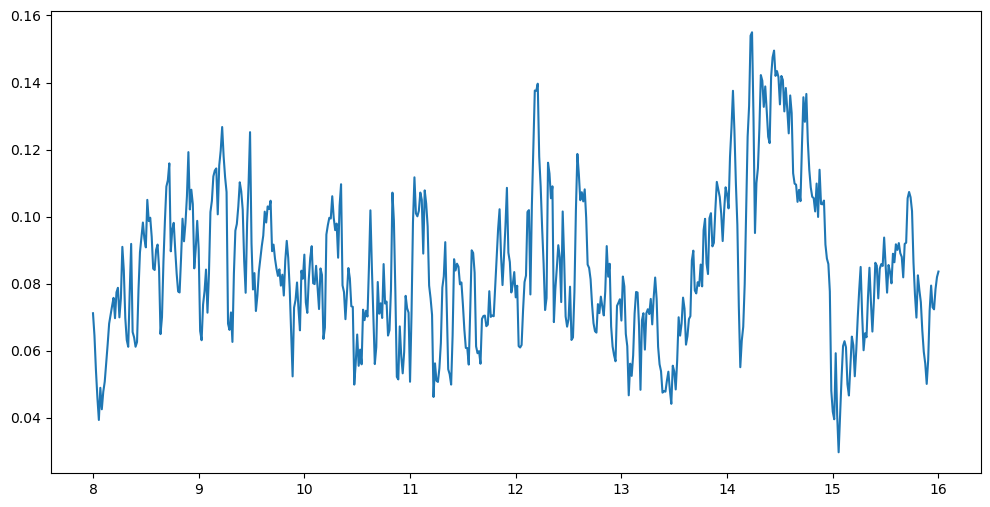

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(roll.time/3600 + 8, roll[:,15])

In [20]:
Rww = xr.open_dataarray(f"{dnc}R_2d_rot.nc")

(0.0, 6000.0)

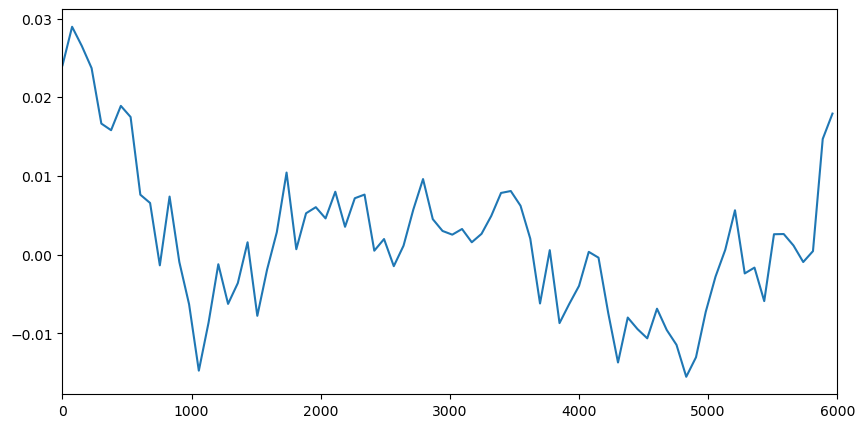

In [31]:
clevs = np.linspace(-.1,.1,101)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(Rww.x, Rww[0,:,0,10])#, clevs, cmap=mpl.cm.seismic)

ax.set_xlim(0,6000)